# Code for plots

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Plots of ML types

C:\Users\qsz629\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\qsz629\AppData\Local\Temp\ipykernel_11452\620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Series(a)) for i,a in enumerate(coef_tab[:6])]),1)\
C:\Users\qsz629\AppData\Local\Temp\ipykernel_11452\620542959.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(dict([(i+1,pd.Ser

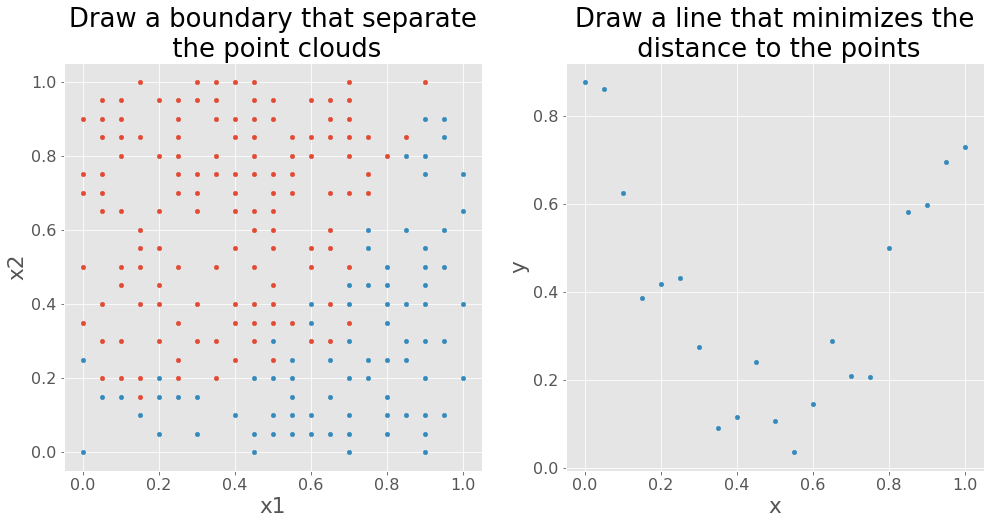

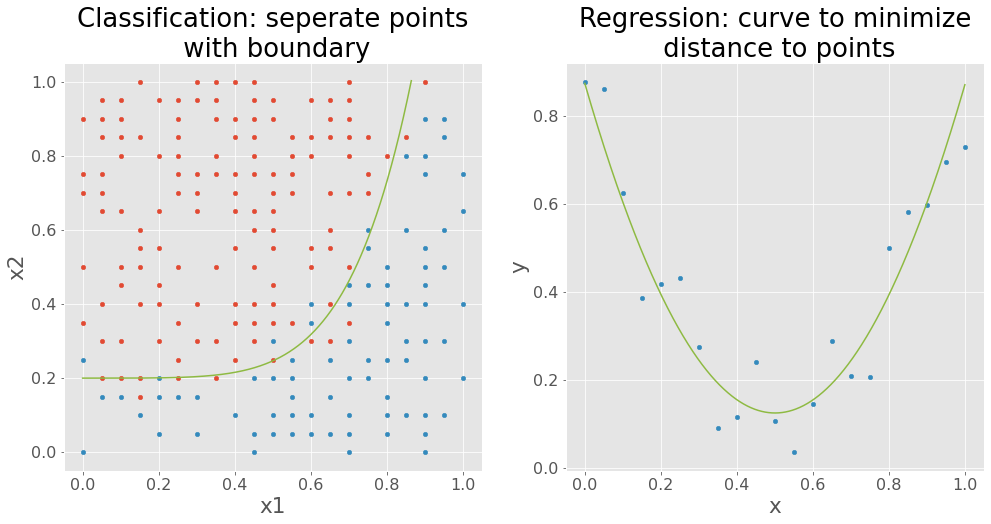

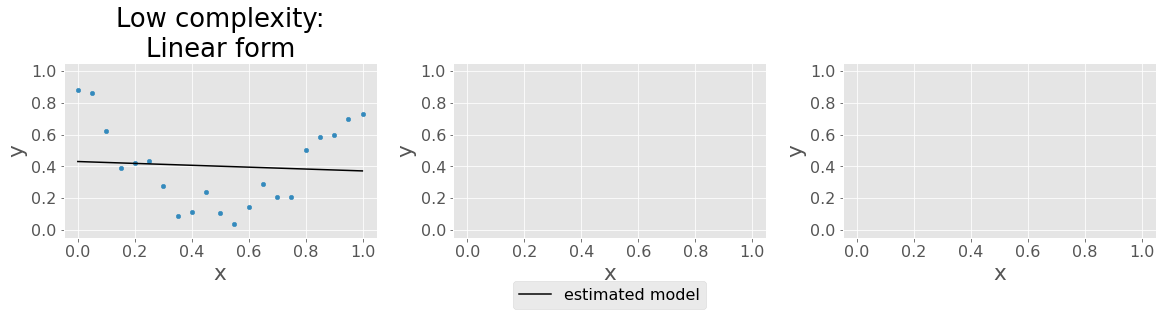

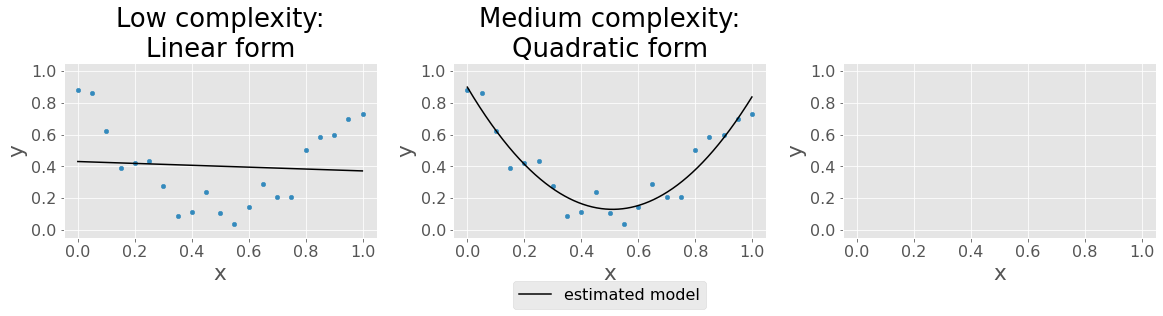

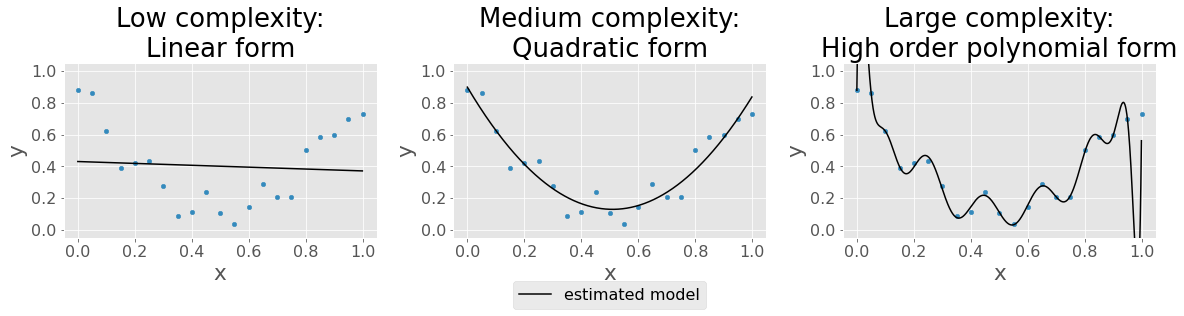

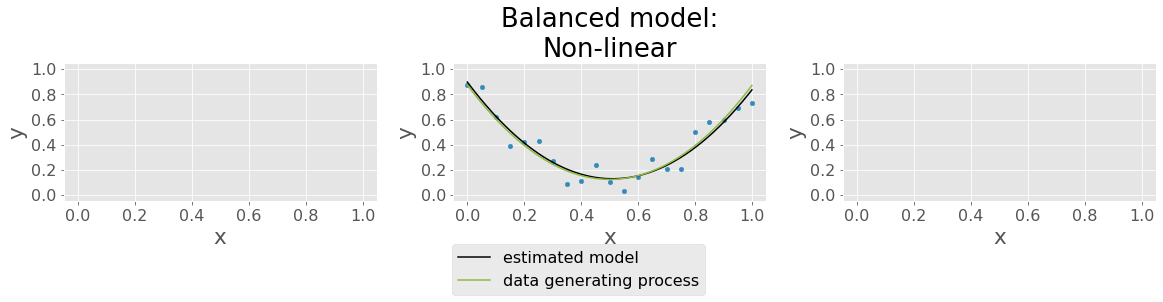

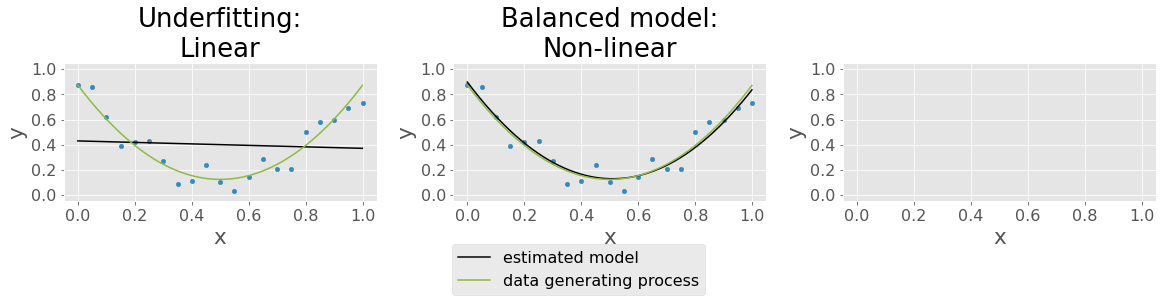

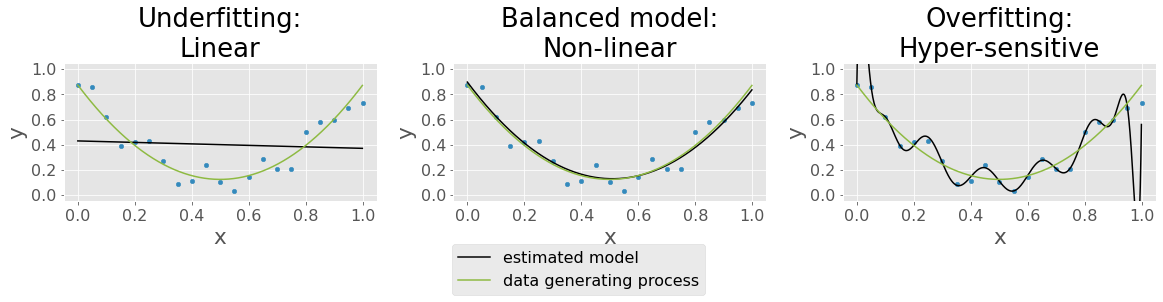

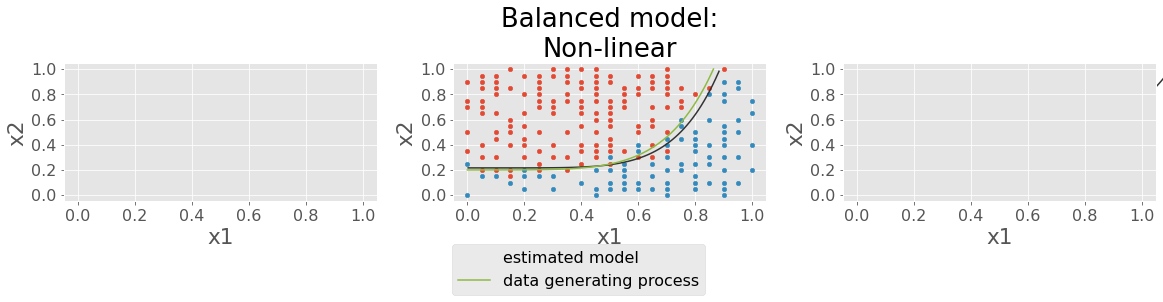

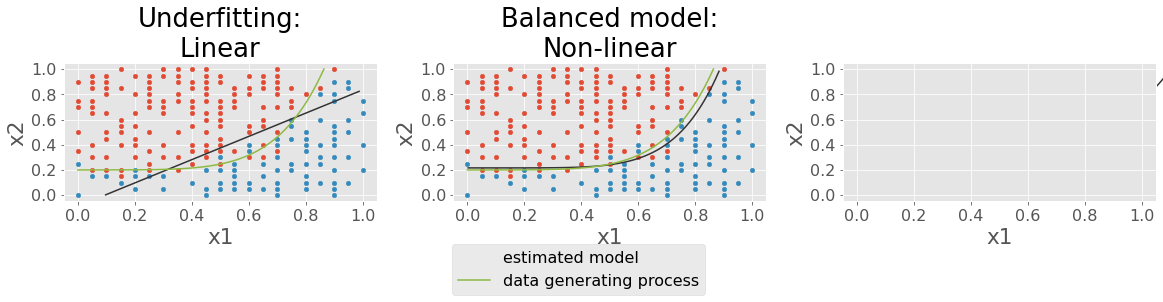

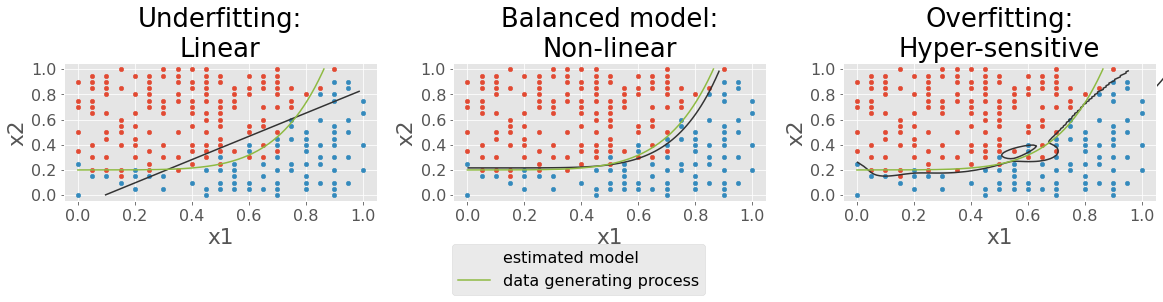

In [8]:
%run ML_plots.ipynb

<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>


# Session 13: Performance Metrics, Non-linear ML and Perspectives

*Tobias Gabel Christiansen*

## Video 13.1: Recap

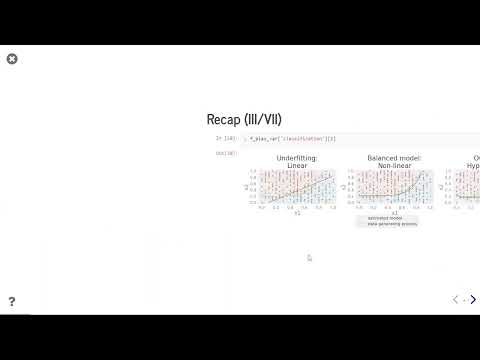

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('L57AUU9vb14', width=640, height=360)

## Video 13.2: Performance Metrics

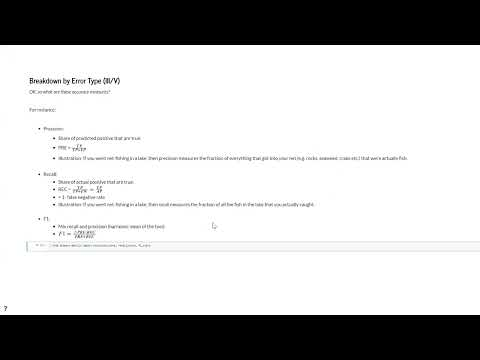

In [13]:
YouTubeVideo('eNjIKW1St-M', width=640, height=360)

## Video 13.3: Non-Linear ML

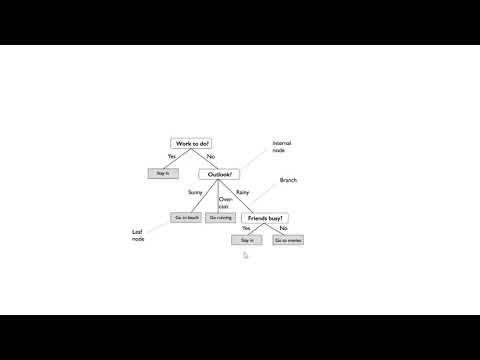

In [16]:
YouTubeVideo('iFow9lPgAZc', width=640, height=360)

## Video 13.4: ML in Social Sciences

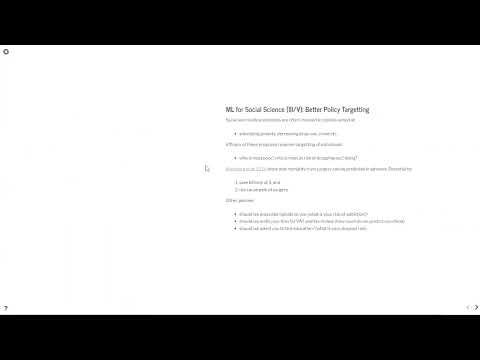

In [15]:
YouTubeVideo('OwLCeBuvz3E', width=640, height=360)

## Recap (I/VII)

The bias/variance trade-off:
- model **bias**: _an error from erroneous assumptions in the learning algorithm_
  - algorithm to misses the relevant relations between features and target (**underfitting**)
   

- model **variance**: _an error from sensitivity to small fluctuations in the training set_
  -  algorithm fits random noise in the training data, rather than the true relation between the features and target (**overfitting**).

## Recap (II/VII)

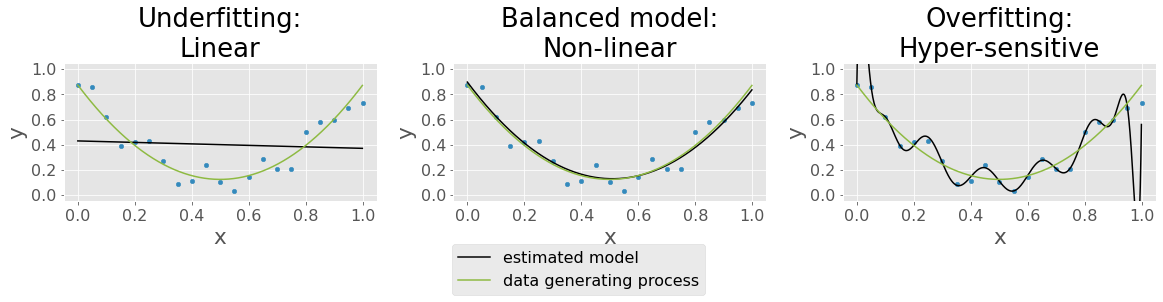

In [9]:
f_bias_var['regression'][2]

## Recap (III/VII)

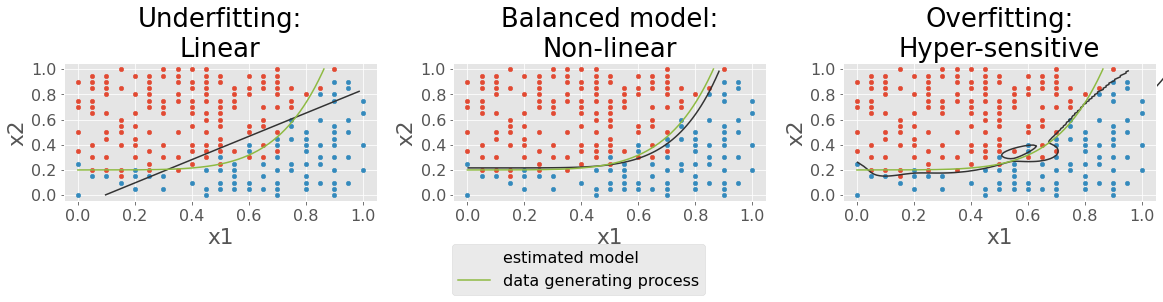

In [10]:
f_bias_var['classification'][2]

## Recap (IV/VII)

Pipelines:

- Chain different transformation techniques:
    - Preprocessing data:
        - Adding polynomials, imputation, rescaling
    - Supervised learning

- When is this an advantage?
    - It ensures good practice - we only fit on training data (no data leakage)
    - Much less code!

## Recap (V/VII)

K-Fold cross-validation for model validation:

- Solves fundamental question: How do we choose between different models (e.g. Lasso with different regularization)?
    - Cannot base on performance on training data: More complex models generally better (overfitting)
        - Illustrated in figures on previous slides
        
    - Cannot base on performance on testing data: Then we do not have an unbiased estimate of out-of-sample performance
        - Coin analogy: If you flip a fair coin 10 times, what is the probability that we get 10 heads? (0.1%) 
        - Now what if we did it with 1000 coins? What is the probability that at some point we get 10 heads? (62%)

- Solution: Introduction of validation split
    - Train model on training data
    - Pick best model based on validation data
    - Use test data for unbiased estimate of out-of-sample performance


- Data efficient: K-fold cross validation

## Recap (VI/VII)

Learning curves and validation curves:

- Learning curves: Fundamentally allow us to check whether model is *underfitted* or *overfitted* given data at hand

- Underfitting:
    - Sign 1: Bad performance in both training and testing data
    - Sign 2: No performance improvement when more training data are added
    - Solution: Use more complex model

- Overfitting:
    - Sign 1: Large gap between testing and training performance
    - Sign 2: Large performance increases on testing data when more is added
    - Solution: Reduce model complexity or collect more (training) data

- Validation curves: Fundamentally allow us to pick best model given data at hand
    - Plot training and testing *accuracy* for different models
    - Pick model with best out-of-sample properties (note: selection is biased!)

## Recap (VII/VII)

Grid search:
- Caveat: Can be very exhaustive computationally when checking many combinations!
    - One solution: Use `RandomizedSearchCV` to search a subset of the combinations (i.e. drop some parameter combinations).

# Overview of Session 13

Today, we will talk about more advanced aspects of applying machine learning in the social sciences. In particular, we cover:
1. Performance Evaluation Metrics
2. Non-linear ML
  -  Tree based models
  -  Neural networks
3. Machine learning for social scientists
4. ML for Social Sciences (outro)
    
No exercises...

# Associated Readings

PML, chapter 6:
- Precision and recall of a classification model
- Plotting a receiver operating characteristic
- Scoring metrics for multiclass classification
- Dealing with class imbalance

Papers for discussing ML in social sciences and more advanced models:
- Varian (2014): How can economists leverage bid data? Intro to methods.
- Mullainathan and Spiess (2017): What can ML do? **And what is it that it can't do?**
- Athey (2017):
    - ML is challenging when used for causal inference (many developments, though!)
    - Useful when we have many covariates (disciplined (algorithmic) model selection)
    - Provides interdisciplinary link (economics out of economics shell!)

These papers are all interesting and fairly easily to read. I highly recommend to take a look.

# Loading Packages...

In [5]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

plt.style.use('default') # set style (colors, background, size, gridlines etc.)
plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

# Measures for Classification

## Breakdown by Error Type (I/V)

We measure the accaracy as the rate of true predictions, i.e. \begin{align}ACC=\frac{TP+TN}{TP+TN+FP+FN}=\frac{True}{True+False}\end{align}

where our measures are defined in a *confusion matrix*:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_08.png' alt="Drawing" style="width: 400px;"/></center>

## Breakdown by Error Type (II/V)

*When could _accuracy_ be an insufficient measure?*

At least two situations:

- When our sample is highly unbalanced
    - Say 99% of sample is negative type.
    - We can then always negative classify as negative
    - Not very interesting...

- When we care more about FP than FN (or vice versa)
    - Suppose we want to predict breast cancer
    - Even though a _FP_ is costly (stress, public expenditure), we probably worry more about _FN_


*So how do we then deal with these issues?*

Luckily, we have solutions:
- Different measures that focus on different parts of the confusion matrix.

## Breakdown by Error Type (III/V)

*OK, so what are these accuracy measures?*

For instance:

- Precision: 
    - Share of predicted positive that are true:
   
    - PRE = $\frac{TP}{TP+FP}$    
    - Illustration: If you went net-fishing in a lake, then precision measures the fraction of everything that got into your net (e.g. rocks, seaweed, crabs etc.) that were actually fish.

- Recall:
    - Share of actual positive that are true:
    - REC = $\frac{TP}{TP+FN}=\frac{TP}{AP}$ 
    - = 1- false negative rate
    - Illustration: If you went net-fishing in a lake, then *recall* measures the fraction of all the fish in the lake that you actually caught.

- F1: 
    - Mix recall and precision (harmonic mean of the two): 
    - $F1 = \frac{2\cdot PRE\cdot REC}{PRE+ REC}$

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

## Breakdown by Error Type (IV/V)

*How about the true positive and false positve rates?*

First, introduce two new measures for predicted likelihood of being in the class or not:
- True positive rate: How many of the positives are detected? $$TPR=REC=\frac{TP}{TP+FN}=\frac{TP}{AP}$$
- False positive rate: How many negatives are not detected (i.e. wrongly classified as positive)? $$FPR=\frac{FP}{FP+TN}=\frac{FP}{AN}$$

Receiver Operating Characteristic (ROC) curve by varying thresholds for predicted true.
- Given false positive rate of $x$, what is the true positive rate?
    - ... can always get a false positive rate of zero by predicting zero positives
    - ... can always get a true positive rate of one by predicting all positives
    - ... hence a trade-off.
- AUC: Area Under the (ROC) Curve.

## Breakdown by Error Type (V/V)

Example from the text book (PML)

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_10.png' alt="Drawing" style="width: 600px;"/></center>

# Non-linear ML

## Success of Machine Learning (I/II)
*Are linear models the best performing models?*

George E. P. Box: All models are wrong

... but some are useful!

Evidence
- Sometimes linear model are the best 
- But there are many others that in general perform better
- They can capture patterns that linear models cannot

## Success of Machine Learning (II/II)
*What do we call models that can fit any pattern?*

- Universal approximators. 
    - We can also make input non-linear using `PolynomialFeatures` of any order.
        - Follows from iterative Taylor expansion
        - Problem?
- These are very powerful tools:
    - Example of recognizing characters and digits in handwriting (MNIST data)

## Models That Fit Any Pattern (I/IV)
*What are examples of very flexible models in ML?*

The simplest ones are probably the class of nearest neighbor algorithms (potentially with a kernel):

A classic algorithm of this type is _K Nearest Neighbors_:
- Fundamental idea: Approximate target value $y_i$ by taking average/mode from K nearest neighbors.
    - Hence, the predicted value for some observation $i$ is $\hat{y}_i=\frac{1}{K}\sum_{k=1}^K y_k$
    - Tasks for the data scientist:
        - How many neighbors? Small $K$ $\Rightarrow$ overfitting
        - What are the neighboring observations? When data are high dimensional? 
            - Common to use Euclidian norm to quantity distance: $L\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\sqrt{\sum_{d=D}\left(x_{d}^{i}-x_{d}^{j}\right)^{2}}$

- Technical note: 
    - Data need standardization: Else, variables that take on large values determine whether observation is neighbor or not.

## Models That Fit Any Pattern (II/IV)

<center><img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png' alt="Drawing" style="width: 650px;"/></center>

## Models That Fit Any Pattern (III/IV)
*What can these flexible models be used for?*


- Reduce bias (underfitting)
- Must be careful we do not overfit

*Can I get an overview of them?*

Most commonly applied include...
- Polynomial inputs in linear models (i.e. Taylor approximation)
- Kernel-based methods, e.g. SVMs
- Tree based models (_comming up_)
- Neural networks/deep learning  (_comming up_)

## Models That Fit Any Pattern (IV/IV)
*Can we use these methods?*

Yes, they all come off the shelf with `sklearn`.
- E.g. `from sklearn.ensemble import RandomForestClassifier`

For neural networks that have more hidden layers (deep learning), you need new packages:
- We recommend looking at either `pytorch` or using `keras` (which uses `tensorflow`)

*Should we use these methods in the exam of this course?*

## NO

It's totally fine just to use the linear models that we have covered with eg. Lasso, Ridge etc. 

# Tree Based Models

## A Hierarchal Structure 
*What does a `decision tree` look like?*



<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_17.png' alt="Drawing" style="width: 800px;"/></center>


## Sample Splitting (I/IV)
*Suppose we have data like below, and we are interested in predicting criminal individuals*

In [11]:
# SIMULATE RANDOM DATA WITH SOME PATTERNS
df = pd.DataFrame({'Criminal':[1]*5+[0]*10,
                   'From Jutland':np.random.randint(0,2,15),                   
                   'Parents criminal':[1]*4+[0]*10+[1],
                   'Unemployed':[1]*7+[0]*8})

# PRINT 10 OBSERVATIONS
print(df.sample(n=10))

    Criminal  From Jutland  Parents criminal  Unemployed
2          1             0                 1           1
1          1             1                 1           1
12         0             1                 0           0
14         0             0                 1           0
8          0             0                 0           0
7          0             1                 0           0
6          0             0                 0           1
11         0             0                 0           0
13         0             0                 0           0
4          1             0                 0           1


## Sample Splitting (II/IV)
*Let's try to split by variables and see whether it helps*

In [11]:
my_split = df\
            .groupby(['From Jutland'])\
            .Criminal\
            .mean()

print(my_split)

From Jutland
0    0.333333
1    0.333333
Name: Criminal, dtype: float64


## Sample Splitting (III/IV)
*What about other variables?*

In [12]:
my_split = df\
            .groupby(['Parents criminal', 'Unemployed'])\
            .Criminal\
            .mean()\
            .unstack(level=-1)

print(my_split)

Unemployed          0         1
Parents criminal               
0                 0.0  0.333333
1                 0.0  1.000000


## Sample Splitting (IV/IV)
*What might a tree structure look like?*

With inspiration from the former example:
- Employed: Yes $\rightarrow$ Not criminal
- Employed: No
    - Parents criminal: No $\rightarrow$ Not criminal
    - Parents criminal: Yes $\rightarrow$ Criminal
    
In the example we just eyeballed which splits appeared to subset the data effectively
- Decision trees actually choose the splitting variable *and* splitting point to minimize the cost function (e.g. MSE)

## Improving Decision Trees (I/II)
*What can we conclude about the decision trees?*

- Can fit anything ~ Universal Approximation
    - *little* underfitting (~low bias)
    - **LARGE** overfitting (~large variance)
    
`random forest` improves on decision trees:
- Resample the data (bagging):
    - Draw $N$ new samples from your data randomly (which replacement)
    - Use a random subset of the features as potential splitting variables at each node
    - Grow a tree-based model on each random draw (until certain dept - regularization!)
        - If classification:
            - Majority vote
        - If regression:
            - Mean outcome in resampled leafs
            
    - The randomness from the sample and splitting variables create decorrelated trees. 
    - When we then average the predictions over these we tend to get and more stable performance 
        -  For i.i.d. random variables we have: $X\sim N(0,\sigma^2)$ vs. $\bar X \sim N(0\frac{\sigma^2}{n^2})$
        -  Trees wont be fully independent, but the logic follows through

## Improving Decision Trees (II/II)

<center><img src='https://miro.medium.com/max/1050/1*9MixqU7EW3v2I0fIvT8AQQ.png' alt="Drawing" style="width: 800px;"/></center>

# Neural Networks

## Neural Networks (I/IV)
*I have forgotten, what was Adaline?*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch12/images/12_01.png' alt="Drawing" style="width: 900px;"/></center>


## Neural Networks (II/IV)
*Why are neural networks called deep learning?*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch12/images/12_02.png' alt="Drawing" style="width: 800px;"/></center>


## Neural Networks (III/IV)
*So learning about the Perceptron and Adaline actually has value?*

Yes, lot's of value: 
- These are the neurons of neural networks. 
- In other words, they are fundamental building blocks for doing deep learning.

## Neural Networks (IV/IV)
*How are neural networks different from simply using polynomial features?*

A bit complicated $-$ and this is part of what makes NN a black box to many.  But:
- [Cheng et al.](https://arxiv.org/abs/1806.06850): Neural nets and polynomial expansion are essentially the same.

There are, however, some differences:
- Hidden layer can be a lot smaller than all possible combinations of polynomial features.
- It uses non-linear activation functions. 
- A neural network with one hidden layer (of finite size) has universal approximation.
- In practice they perform really well, especially on non-linear data
    - Computer vision: recognizing characters, content in images
    - Natural Language Processing (NLP): parsing text and speech data
    - Much more
    
- Want to know more about Neural Networks? 
    - Advanced Deep Learning (ADL): Course at DIKU that focuses on different types of NNs

# ML for Social Science: A Recap and Perspectives

## ML for Social Science (I/V): Testing Predictive Power

ML helps us making predictive models: 
- Assess the performance of our models
- Chooses the parameters that help estimate the best performing model 

*Can we use ML to help us clarify whether a new feature set is relevant for prediction?*

We can check whether prediction performance increases at given approach.

## ML for Social Science (II/V): New Data

Machine learning can help us *'fill in the blanks'* and impute missing data

Input: Google Street View
- Infer neighborhood socioeconomic status [(Naik, Raskar, Hidalgo 2016)](https://www.aeaweb.org/articles?id=10.1257/aer.p20161030)

Input: Cell phone data
- Inferring mode of transportation [(Bjerre-Nielsen et al. 2019)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0234003)
- Extracting sleep patterns [(Cuttone et al. 2017)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0169901)

Facebook data (likes, way of writing, town) can help infer:
- personality and demographics (Cambridge Analytica),
- socioeconomic status, current mood and more

## ML for Social Science (III/V): Better Policy Targetting

Social and medical scientists are often involved in policies aimed at: 
- alleviating poverty, decreasing drop-out, crime etc.

Efficacy of these programs requires targetting of individuals:
- who is most poor? who is most at risk of dropping out? dying?

[Kleinberg et al. 2015](https://www.cs.cornell.edu/home/kleinber/aer15-prediction.pdf) show that mortality from surgery can be predicted in advance. Potential to:
1. save billions of \$, and 
2. not cause pain of surgery.

Other policies: 
- should we prescribe opioids to you (what is your risk of addiction?)
- should we audit your firm for VAT and tax review (how much do we predict you cheat)
- should we admit you to this education? (what is your dropout risk)

## ML for Social Science (IV/V):  Improving Econometrics

Many econometric methods try to establish causality:

- In particular, there are applications for machine learning when it comes to:
    - Instrument variables ([Hartford et al. 2017](http://proceedings.mlr.press/v70/hartford17a.html); [Bjørn 2018](https://absalon.ku.dk/courses/25306/files/2558821?module_item_id=674951), see work by Hansen, Belloni, Chernozhukov)
    - Matching ([Wager, Athey 2017](https://www.tandfonline.com/doi/full/10.1080/01621459.2017.1319839))
- models for matching and instrument variables have a prediction problem built-in
    - This is what ML does! Hence, it can potentially be enhanced with machine learning


## ML for Social Science (V/V): Decision Problems and Game Theory

We can solve decision problems and games using reinforcement learning
- uses neural networks act as an "agent" that plays game
    - learn to play computer games, poker, etc.
- solve problems where game theory is intractable


# Outro on ML

There are amazing resources for you to keep learning machine learning.

- A fairly new education MSc Social Data Science
    - Not all courses are open yet...
- Dept. of Econonomics / Center for Social Data Science 
    - [SDS econometrics and machine learning](https://kurser.ku.dk/course/a%C3%98kk08400u/2019-2020): tree based models for prediction and statistics; network inference (offered again in 2023)
- More courses are taught in machine learning at CS dept. (DIKU), DTU, ITU
    - Machine Learning A / B
    - Online and Reinforcement Learning
    - Large-Scale Data Analysis (LSDA)
    - Advanced Topics in Machine Learning (ATML)
    - Advanced Deep Learning (ADL)
    - Many, many, many more...
    